The objective is to develop a model to forecast electricity consumption in the Central Building of IST ALAMEDA CAMPUS using data from 2017 & 2018 and test the model for 2019 data.

#  Data Preparation

In [1]:
import pandas as pd # data science library o manipulate data
import numpy as np # mathematical library to manipulate arrays and matrices
import matplotlib.pyplot as plt # visualization library
import seaborn as sb #visualization library specific for data science, based on matplotlib 

#### Importing data files as panda dataframe

In [2]:
df1_raw = pd.read_csv('IST_Central_Pav_2017.csv') 

In [3]:
df2_raw = pd.read_csv('IST_Central_Pav_2018.csv') 

In [4]:
df3_raw = pd.read_csv('IST_meteo_data_2017_2018_2019.csv') 

#### Observing data

In [5]:
df1_raw

,Date_start,Power_kW
0,1-1-2017 0:00,117.823342
1,1-1-2017 1:00,119.190699
2,1-1-2017 2:00,117.972992
3,1-1-2017 3:00,116.413288
4,1-1-2017 4:00,116.172384
...,...,...
8755,31-12-2017 19:00,108.946301
8756,31-12-2017 20:00,108.813396
8757,31-12-2017 21:00,106.699884
8758,31-12-2017 22:00,107.669780


In [6]:
df2_raw

,Date_start,Power_kW
0,1-1-2018 0:00,106.451864
1,1-1-2018 1:00,106.757860
2,1-1-2018 2:00,104.513746
3,1-1-2018 3:00,106.192750
4,1-1-2018 4:00,104.896974
...,...,...
8755,31-12-2018 19:00,120.098014
8756,31-12-2018 20:00,110.610236
8757,31-12-2018 21:00,110.773490
8758,31-12-2018 22:00,111.453087


In [7]:
df3_raw

,yyyy-mm-dd hh:mm:ss,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
0,2017-01-01 00:00:00,8.72,74.60,2.138,3.774,1029,1.163,0.0,0.0
1,2017-01-01 00:05:00,8.68,74.60,1.929,3.019,1029,1.496,0.0,0.0
2,2017-01-01 00:10:00,8.69,74.50,1.824,2.516,1029,1.025,0.0,0.0
3,2017-01-01 00:15:00,8.62,75.10,2.264,3.271,1029,1.690,0.0,0.0
4,2017-01-01 00:20:00,8.63,75.00,3.061,3.774,1029,1.108,0.0,0.0
...,...,...,...,...,...,...,...,...,...
215004,2019-04-11 14:43:00,15.70,43.97,0.000,0.000,1021,348.000,0.0,0.0
215005,2019-04-11 14:48:00,15.35,44.42,0.000,0.000,1021,273.000,0.0,0.0
215006,2019-04-11 14:53:00,15.34,41.15,0.000,0.000,1021,320.900,0.0,0.0
215007,2019-04-11 15:18:00,15.26,42.01,0.000,0.000,1021,615.900,0.0,0.0


In [8]:
df1_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date_start  8760 non-null   object 
 1   Power_kW    8760 non-null   float64
dtypes: float64(1), object(1)
memory usage: 137.0+ KB


In [9]:
df2_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date_start  8760 non-null   object 
 1   Power_kW    8760 non-null   float64
dtypes: float64(1), object(1)
memory usage: 137.0+ KB


In [10]:
df3_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215009 entries, 0 to 215008
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   yyyy-mm-dd hh:mm:ss  215009 non-null  object 
 1   temp_C               215009 non-null  float64
 2   HR                   215009 non-null  float64
 3   windSpeed_m/s        215009 non-null  float64
 4   windGust_m/s         215009 non-null  float64
 5   pres_mbar            215009 non-null  int64  
 6   solarRad_W/m2        215009 non-null  float64
 7   rain_mm/h            215009 non-null  float64
 8   rain_day             215009 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 14.8+ MB


#### Renaming  columns

In [11]:
df1_raw.rename(columns = {'Date_start': 'date'}, inplace = True)

In [12]:
df2_raw.rename(columns = {'Date_start': 'date'}, inplace = True)

In [13]:
df3_raw.rename(columns = {'yyyy-mm-dd hh:mm:ss': 'date'}, inplace = True)

#### Changing "date" column into Datetime type and use date as index

The three data files have no null data values so far from the obseravtion. The power consumption data is at hourly intervals where as meteo data is in every five minutes. The date column is an object and needs to be changed to datetime type.

In [14]:
df1_raw['date'] = pd.to_datetime(df1_raw['date'], format='%d-%m-%Y %H:%M')
df1_raw = df1_raw.set_index ('date', drop = True)
df1_raw

,Power_kW
date,
2017-01-01 00:00:00,117.823342
2017-01-01 01:00:00,119.190699
2017-01-01 02:00:00,117.972992
2017-01-01 03:00:00,116.413288
2017-01-01 04:00:00,116.172384
...,...
2017-12-31 19:00:00,108.946301
2017-12-31 20:00:00,108.813396
2017-12-31 21:00:00,106.699884


In [15]:
df2_raw['date'] = pd.to_datetime(df2_raw['date'], format='%d-%m-%Y %H:%M')
df2_raw = df2_raw.set_index ('date', drop = True)
df2_raw

,Power_kW
date,
2018-01-01 00:00:00,106.451864
2018-01-01 01:00:00,106.757860
2018-01-01 02:00:00,104.513746
2018-01-01 03:00:00,106.192750
2018-01-01 04:00:00,104.896974
...,...
2018-12-31 19:00:00,120.098014
2018-12-31 20:00:00,110.610236
2018-12-31 21:00:00,110.773490


In [16]:
df3_raw['date'] = pd.to_datetime(df3_raw['date'])
df3_raw = df3_raw.set_index ('date', drop = True)
df3_raw

,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
date,,,,,,,,
2017-01-01 00:00:00,8.72,74.60,2.138,3.774,1029,1.163,0.0,0.0
2017-01-01 00:05:00,8.68,74.60,1.929,3.019,1029,1.496,0.0,0.0
2017-01-01 00:10:00,8.69,74.50,1.824,2.516,1029,1.025,0.0,0.0
2017-01-01 00:15:00,8.62,75.10,2.264,3.271,1029,1.690,0.0,0.0
2017-01-01 00:20:00,8.63,75.00,3.061,3.774,1029,1.108,0.0,0.0
...,...,...,...,...,...,...,...,...
2019-04-11 14:43:00,15.70,43.97,0.000,0.000,1021,348.000,0.0,0.0
2019-04-11 14:48:00,15.35,44.42,0.000,0.000,1021,273.000,0.0,0.0
2019-04-11 14:53:00,15.34,41.15,0.000,0.000,1021,320.900,0.0,0.0


#### Resampling meteo data to hourly format

In [17]:
# Define aggregation methods for each column
aggregations = {
    'temp_C': 'mean',          # Resample temperature using mean
    'HR': 'mean',              # Resample humidity using mean
    'windSpeed_m/s': 'mean',   # Resample wind speed using mean
    'windGust_m/s': 'mean',    # Resample wind gust using mean
    'pres_mbar': 'mean',       # Resample pressure using mean
    'solarRad_W/m2': 'sum',    # Resample solar radiation using sum
    'rain_mm/h': 'mean',        # Resample rainfall using mean
    'rain_day': 'max'          # Resample rain day using max
}

# Resample the DataFrame using the defined aggregations
df3_hourly = df3_raw.resample('H').agg(aggregations)


#df3_hourly = df3_raw.resample('H').sum()
df3_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19936 entries, 2017-01-01 00:00:00 to 2019-04-11 15:00:00
Freq: H
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp_C         17802 non-null  float64
 1   HR             17802 non-null  float64
 2   windSpeed_m/s  17802 non-null  float64
 3   windGust_m/s   17802 non-null  float64
 4   pres_mbar      17802 non-null  float64
 5   solarRad_W/m2  19936 non-null  float64
 6   rain_mm/h      17802 non-null  float64
 7   rain_day       17802 non-null  float64
dtypes: float64(8)
memory usage: 1.4 MB


In [18]:
df3_hourly

,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
date,,,,,,,,
2017-01-01 00:00:00,8.532500,74.966667,2.344500,3.270750,1029.000000,16.261,0.0,0.0
2017-01-01 01:00:00,7.930000,76.308333,2.692417,3.480333,1028.166667,17.728,0.0,0.0
2017-01-01 02:00:00,7.263417,80.275000,3.300250,4.067167,1028.000000,16.981,0.0,0.0
2017-01-01 03:00:00,6.831333,81.333333,3.534333,4.423583,1028.000000,18.504,0.0,0.0
2017-01-01 04:00:00,6.500250,81.241667,4.006000,5.262333,1028.000000,10.692,0.0,0.0
...,...,...,...,...,...,...,...,...
2019-04-11 11:00:00,15.615000,47.215000,0.000000,0.000000,1022.083333,10430.400,0.0,0.0
2019-04-11 12:00:00,15.872500,46.630000,0.000000,0.000000,1022.000000,7687.100,0.0,0.0
2019-04-11 13:00:00,16.315833,45.955833,0.000000,0.000000,1021.416667,10269.700,0.0,0.0


#### Data completion (filling missing data)

After resampling meteo data seems to have null values and is need to be completed using 

In [19]:
df3_hourly = df3_hourly.interpolate(method='nearest')
df3_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19936 entries, 2017-01-01 00:00:00 to 2019-04-11 15:00:00
Freq: H
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp_C         19936 non-null  float64
 1   HR             19936 non-null  float64
 2   windSpeed_m/s  19936 non-null  float64
 3   windGust_m/s   19936 non-null  float64
 4   pres_mbar      19936 non-null  float64
 5   solarRad_W/m2  19936 non-null  float64
 6   rain_mm/h      19936 non-null  float64
 7   rain_day       19936 non-null  float64
dtypes: float64(8)
memory usage: 1.4 MB


#### Merging meteo and power consumption data into single dataframe

In [20]:
df_power = pd.concat([df1_raw, df2_raw])
df_power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2017-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Power_kW  17520 non-null  float64
dtypes: float64(1)
memory usage: 273.8 KB


In [21]:
all_data=pd.merge(df_power,df3_hourly, left_index=True, right_index=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2017-01-01 00:00:00 to 2018-12-31 23:00:00
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Power_kW       17520 non-null  float64
 1   temp_C         17520 non-null  float64
 2   HR             17520 non-null  float64
 3   windSpeed_m/s  17520 non-null  float64
 4   windGust_m/s   17520 non-null  float64
 5   pres_mbar      17520 non-null  float64
 6   solarRad_W/m2  17520 non-null  float64
 7   rain_mm/h      17520 non-null  float64
 8   rain_day       17520 non-null  float64
dtypes: float64(9)
memory usage: 1.3 MB


### Vizualizing the data 

<Axes: xlabel='date'>

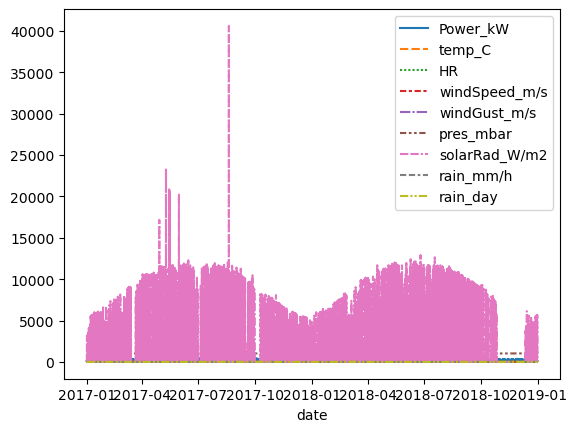

In [22]:
sb.lineplot(data = all_data)

Ploting the data excluding solar radiaion

<Axes: xlabel='date'>

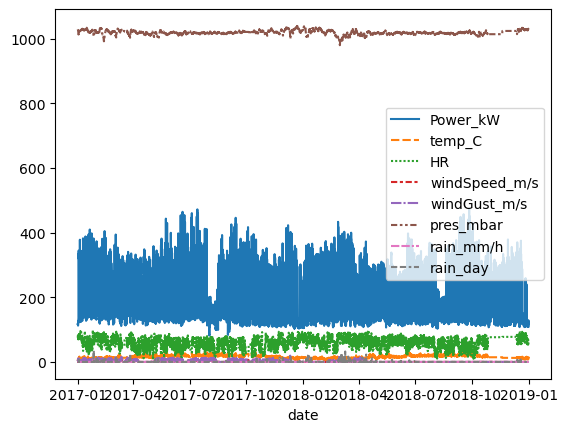

In [23]:
# Get the list of columns to include in the plot
columns_to_include = [col for col in all_data.columns if col != 'solarRad_W/m2']

# Plot the data excluding solarRad_W/m2
sb.lineplot(data=all_data[columns_to_include])

#   Exploratory Data Analysis

#### Quick statistics check

In [24]:
all_data.describe()

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,185.812794,16.195584,60.725485,1.706386,2.192357,1018.977478,2203.492301,0.051148,0.576747
std,79.422749,5.083130,17.400834,2.547504,3.242318,6.411660,3362.930326,0.378907,2.532805
min,81.673046,2.948417,9.680833,0.000000,0.000000,979.916667,0.000000,0.000000,0.000000
25%,129.184460,12.650000,49.015208,0.000000,0.000000,1015.250000,12.407500,0.000000,0.000000
50%,145.224270,15.448542,63.446000,0.000000,0.000000,1019.000000,55.873000,0.000000,0.000000
75%,245.614021,19.175417,75.008333,3.434500,4.381687,1023.000000,3818.000000,0.000000,0.000000
max,475.254370,41.048333,98.625000,14.568333,19.414167,1039.583333,40601.790000,16.408333,34.500000


## Exploring data 

#### Checking for outliers visually 

In [25]:
# In Power
df_sort_kW = all_data.sort_values(by = 'Power_kW', ascending = False)
df_sort_kW [:9] # view last 10 entries

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
date,,,,,,,,,
2018-09-26 15:00:00,475.254370,30.604167,29.075000,0.000000,0.000000,1021.000000,7578.7,0.0,0.0
2017-07-13 15:00:00,472.035546,29.838333,26.731667,7.268083,8.931667,1016.000000,9086.9,0.0,0.0
2017-06-19 15:00:00,464.449677,30.948333,28.511667,6.476333,8.385667,1012.333333,8787.0,0.0,0.0
2017-07-04 15:00:00,460.374815,26.225833,32.076667,5.141750,6.626583,1014.000000,9213.0,0.0,0.0
2017-07-14 14:00:00,459.757589,27.487500,34.583333,5.117250,6.353167,1016.166667,10945.0,0.0,0.0
2017-07-13 14:00:00,459.515848,29.435000,29.191667,8.005417,9.642750,1016.083333,10240.2,0.0,0.0
2017-06-19 14:00:00,457.401080,34.501667,21.912500,3.532583,4.612333,1012.000000,10246.0,0.0,0.0
2018-09-17 15:00:00,456.984155,26.068333,34.774167,0.000000,0.000000,1015.000000,7777.8,0.0,0.0
2017-07-04 14:00:00,454.619484,25.700000,32.558000,6.104200,7.950600,1014.000000,4264.0,0.0,0.0


In [26]:
df_sort_kW = all_data.sort_values(by = 'Power_kW', ascending = True)
df_sort_kW [:9] # view first 10 entries

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
date,,,,,,,,,
2017-08-02 04:00:00,81.673046,15.778333,73.400000,6.213000,7.316500,1019.916667,70.053,0.0,0.0
2017-08-02 02:00:00,83.023659,16.074167,73.416667,5.634500,7.400333,1020.000000,58.614,0.0,0.0
2017-08-01 23:00:00,83.090007,16.796667,71.150833,5.478583,6.750750,1021.000000,47.924,0.0,0.0
2017-08-02 01:00:00,83.388260,16.231667,73.216667,5.508667,6.645167,1020.000000,45.083,0.0,0.0
2017-08-02 03:00:00,83.485375,15.886667,72.866667,5.264000,6.813667,1020.000000,43.949,0.0,0.0
2017-09-01 03:00:00,83.510700,17.276154,63.373846,6.149308,7.198000,1017.692308,17.139,0.0,0.0
2017-09-01 04:00:00,83.554025,17.532500,61.202500,6.079750,7.275167,1017.000000,11.378,0.0,0.0
2017-09-01 01:00:00,83.592536,17.099167,65.120000,6.992167,8.470250,1018.000000,14.259,0.0,0.0
2017-08-01 21:00:00,84.525386,18.070000,61.814167,5.192583,6.311167,1021.000000,38.312,0.0,0.0


 No obvious outliers for Power_kW

In [27]:
# In Temperature
df_sort_T = all_data.sort_values(by = 'temp_C', ascending = False)
df_sort_T [:9] # view first 10 entries

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
date,,,,,,,,,
2018-08-04 15:00:00,131.862767,41.048333,13.688333,0.0,0.0,1015.000000,9428.0,0.0,0.0
2018-08-04 16:00:00,131.622700,40.415833,14.172500,0.0,0.0,1014.750000,7955.8,0.0,0.0
2018-08-04 17:00:00,133.876443,40.311667,11.470000,0.0,0.0,1014.000000,6193.6,0.0,0.0
2018-08-04 14:00:00,132.215019,40.038333,13.565833,0.0,0.0,1015.583333,10251.0,0.0,0.0
2018-08-03 16:00:00,304.636359,39.090000,10.032500,0.0,0.0,1015.000000,8313.3,0.0,0.0
2018-08-03 17:00:00,253.023398,38.956667,9.680833,0.0,0.0,1015.000000,6355.1,0.0,0.0
2018-08-04 13:00:00,126.159970,38.921667,14.541667,0.0,0.0,1016.000000,10549.0,0.0,0.0
2018-08-03 14:00:00,338.993582,38.770833,13.241667,0.0,0.0,1015.916667,10572.0,0.0,0.0
2018-08-02 17:00:00,279.702241,38.745000,16.108333,0.0,0.0,1012.000000,6377.2,0.0,0.0


In [28]:
df_sort_T = all_data.sort_values(by = 'temp_C', ascending = True)
df_sort_T [:9] # view first 10 entries


,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
date,,,,,,,,,
2017-01-25 08:00:00,276.903900,2.948417,98.625000,1.044750,1.362583,1024.916667,765.550,0.0,0.0
2017-01-19 08:00:00,300.717217,3.139000,47.252500,4.877833,6.058667,1022.000000,830.553,0.0,0.0
2017-01-19 07:00:00,201.802874,3.139750,47.254167,5.110333,6.499583,1021.583333,18.067,0.0,0.0
2017-01-20 09:00:00,387.636995,3.235667,78.941667,2.550667,3.228667,1019.416667,2460.800,0.0,0.0
2017-01-19 09:00:00,374.639675,3.486833,45.850000,5.410500,6.710167,1022.000000,2657.400,0.0,0.0
2017-01-19 06:00:00,160.306009,3.586833,45.824167,5.338917,6.729000,1021.083333,5.486,0.0,0.0
2017-01-25 09:00:00,362.235301,3.695833,95.808333,1.336417,1.803167,1025.000000,2240.500,0.0,0.0
2017-01-20 06:00:00,161.853783,3.924750,80.766667,1.022000,1.404667,1018.000000,15.765,0.0,0.0
2017-01-19 05:00:00,147.110691,3.956750,38.978333,5.276083,6.562417,1021.000000,6.622,0.0,0.0


 No obvious outliers for temperature

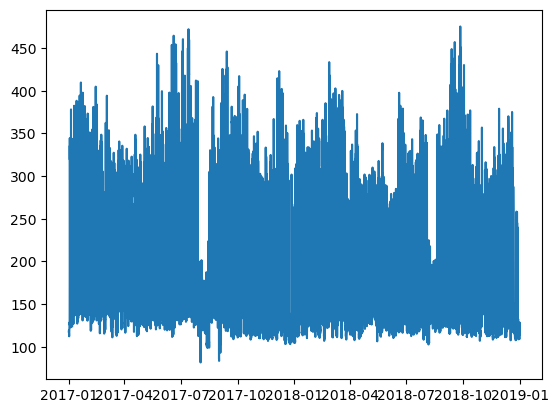

In [29]:
plt.plot(all_data['Power_kW'])

#### More complex time series plot

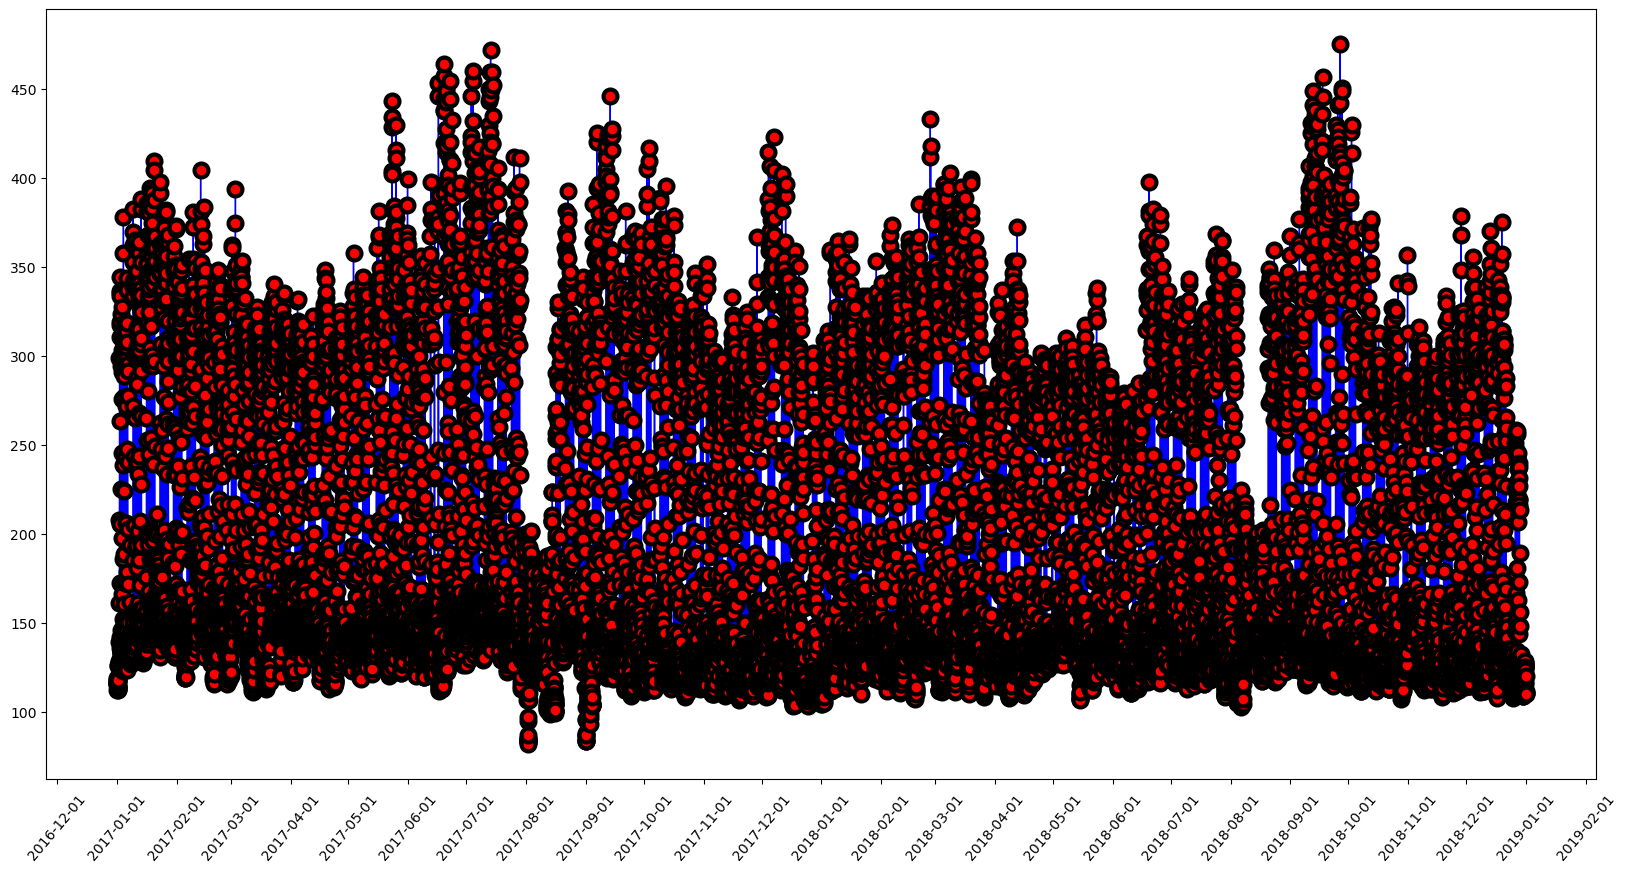

In [30]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots() # create objects of the plot (figure and plot inside)
fig.set_size_inches(20,10) # define figure size

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # define the interval between ticks on x axis

ax.xaxis.set_tick_params (which = 'major', pad = 5, labelrotation = 50)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # Specify the date format for the x-axis labels

# Plot:
plt.plot (all_data['Power_kW'], '-o', color = 'blue',
         markersize = 10, linewidth = 1, # point size; line thickness;
         markerfacecolor = 'red', # color inside the point
         markeredgecolor = 'black', # color of edge
         markeredgewidth = 3)


Its clear from the plot there is a clear drop in power consumption in August(below 200 KW). There are no visible outliers eventhough power consumption goes very high in June-July 2017 and October 2018.

#### Box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x2a2b2266e10>,
 'caps': [<matplotlib.lines.Line2D at 0x2a2b53c23d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a2b16bb2d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a2b387d110>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a2b4f990d0>],
 'means': []}

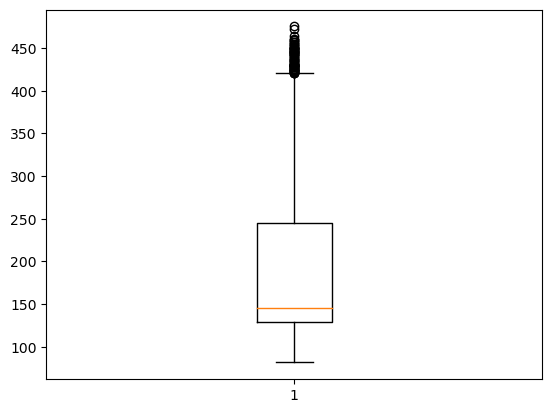

In [31]:
plt.boxplot(all_data['Power_kW'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a2b42f3a90>,
 'caps': [<matplotlib.lines.Line2D at 0x2a2b1300450>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a2b42f3a10>],
 'medians': [<matplotlib.lines.Line2D at 0x2a2b1303490>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a2b42f3090>],
 'means': []}

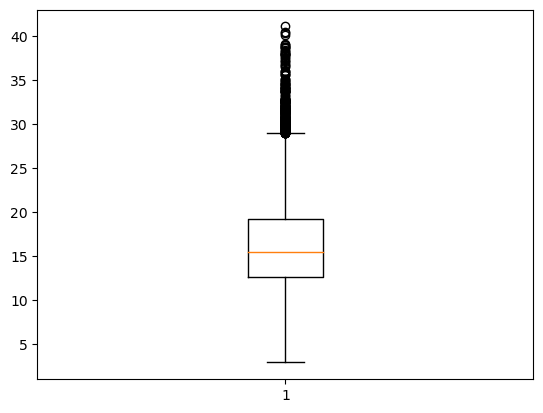

In [32]:
plt.boxplot(all_data['temp_C'])

<Axes: xlabel='Power_kW'>

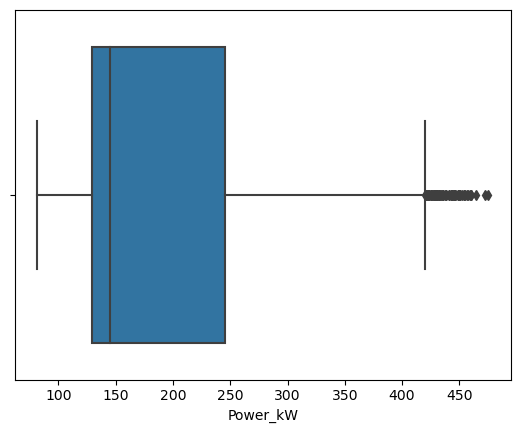

In [33]:
sb.boxplot(x=all_data['Power_kW']) # Bloxplot using seaborn

Conclusion: From the box plots its clear that there are significant fliers (Individual data points that fall outside the whiskers) and hence significant outliers, which might be corresponding to the significant outliers in temperatures.

### Outliers removal 


#### 1- Removing outliers: based on z-score

z-score is calculated to find the outliers considering 3 as the threshold zscore (Includes 99.7% of the data)

In [34]:
from scipy import stats
#import numpy as np
z = np.abs(stats.zscore(all_data['Power_kW']))
print(z)

date
2017-01-01 00:00:00    0.856069
2017-01-01 01:00:00    0.838853
2017-01-01 02:00:00    0.854185
2017-01-01 03:00:00    0.873824
2017-01-01 04:00:00    0.876857
                         ...   
2018-12-31 19:00:00    0.827429
2018-12-31 20:00:00    0.946891
2018-12-31 21:00:00    0.944836
2018-12-31 22:00:00    0.936279
2018-12-31 23:00:00    0.955522
Name: Power_kW, Length: 17520, dtype: float64


In [35]:
threshold = 3 # 3 sigma...Includes 99.7% of the data
print(z>3)
print(np.where(z > 3))

date
2017-01-01 00:00:00    False
2017-01-01 01:00:00    False
2017-01-01 02:00:00    False
2017-01-01 03:00:00    False
2017-01-01 04:00:00    False
                       ...  
2018-12-31 19:00:00    False
2018-12-31 20:00:00    False
2018-12-31 21:00:00    False
2018-12-31 22:00:00    False
2018-12-31 23:00:00    False
Name: Power_kW, Length: 17520, dtype: bool
(array([ 3421,  3422,  3423,  3470,  3997,  3998,  4065,  4066,  4069,
        4070,  4071,  4089,  4090,  4093,  4094,  4141,  4142,  4166,
        4406,  4429,  4430,  4431,  4621,  4622,  4623,  4641,  4642,
        4645,  4646,  4647,  4669,  4670,  4671,  5966,  6110,  6134,
        6158, 10114, 14845, 14846, 14869, 14870, 14871, 14893, 14894,
       14917, 14918, 14986, 14990, 14991, 15157, 15177, 15178, 15205,
       15206, 15230, 15231, 15349, 15350], dtype=int64),)


In [36]:
df_clean1=all_data[(z < 3)]
df_clean1

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
date,,,,,,,,,
2017-01-01 00:00:00,117.823342,8.532500,74.966667,2.344500,3.270750,1029.000000,16.261,0.0,0.0
2017-01-01 01:00:00,119.190699,7.930000,76.308333,2.692417,3.480333,1028.166667,17.728,0.0,0.0
2017-01-01 02:00:00,117.972992,7.263417,80.275000,3.300250,4.067167,1028.000000,16.981,0.0,0.0
2017-01-01 03:00:00,116.413288,6.831333,81.333333,3.534333,4.423583,1028.000000,18.504,0.0,0.0
2017-01-01 04:00:00,116.172384,6.500250,81.241667,4.006000,5.262333,1028.000000,10.692,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,120.098014,13.361667,54.013333,0.000000,0.000000,1031.000000,13.348,0.0,0.0
2018-12-31 20:00:00,110.610236,12.810000,55.441667,0.000000,0.000000,1031.000000,15.869,0.0,0.0
2018-12-31 21:00:00,110.773490,12.565000,55.291667,0.000000,0.000000,1031.000000,14.346,0.0,0.0


#### 2- Removing outliers: calculate IQR (Tukey’s method)

In [37]:
Q1 = all_data['Power_kW'].quantile(0.25)

print(Q1)
Q3 = all_data['Power_kW'].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)

129.18445995
245.614020925
116.42956097500002


In [38]:
print((all_data['Power_kW'] < (Q1 - 1.5 * IQR)) | (all_data['Power_kW'] > (Q3 + 1.5 * IQR))) 

date
2017-01-01 00:00:00    False
2017-01-01 01:00:00    False
2017-01-01 02:00:00    False
2017-01-01 03:00:00    False
2017-01-01 04:00:00    False
                       ...  
2018-12-31 19:00:00    False
2018-12-31 20:00:00    False
2018-12-31 21:00:00    False
2018-12-31 22:00:00    False
2018-12-31 23:00:00    False
Name: Power_kW, Length: 17520, dtype: bool


In [39]:
df_clean2 = all_data[((all_data['Power_kW'] > (Q1 - 1.5 * IQR)) & (all_data['Power_kW'] < (Q3 + 1.5 * IQR)))]
df_clean2

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
date,,,,,,,,,
2017-01-01 00:00:00,117.823342,8.532500,74.966667,2.344500,3.270750,1029.000000,16.261,0.0,0.0
2017-01-01 01:00:00,119.190699,7.930000,76.308333,2.692417,3.480333,1028.166667,17.728,0.0,0.0
2017-01-01 02:00:00,117.972992,7.263417,80.275000,3.300250,4.067167,1028.000000,16.981,0.0,0.0
2017-01-01 03:00:00,116.413288,6.831333,81.333333,3.534333,4.423583,1028.000000,18.504,0.0,0.0
2017-01-01 04:00:00,116.172384,6.500250,81.241667,4.006000,5.262333,1028.000000,10.692,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,120.098014,13.361667,54.013333,0.000000,0.000000,1031.000000,13.348,0.0,0.0
2018-12-31 20:00:00,110.610236,12.810000,55.441667,0.000000,0.000000,1031.000000,15.869,0.0,0.0
2018-12-31 21:00:00,110.773490,12.565000,55.291667,0.000000,0.000000,1031.000000,14.346,0.0,0.0


#### 3- Clean (Delete) datafrom outliers from EDA

With this method, we delete all points which are below the first quartile (Q1). This will delete 25% of the data set (too much data is deleted)

In [40]:
df_clean3 = all_data[all_data['Power_kW'] >all_data['Power_kW'].quantile(0.25) ]

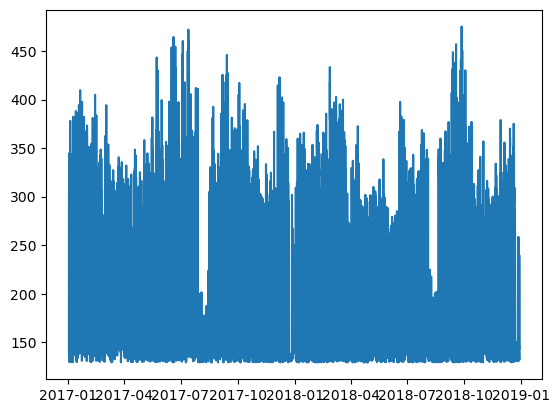

In [41]:
plt.plot(df_clean3['Power_kW'])

In [42]:
df_clean3

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
date,,,,,,,,,
2017-01-02 06:00:00,139.113338,10.420000,81.575000,7.307250,9.330667,1013.000000,20.911,0.0,0.0
2017-01-02 07:00:00,161.108675,10.256667,82.433333,8.137667,10.125833,1013.000000,21.215,0.0,0.0
2017-01-02 08:00:00,207.568880,10.105833,80.658333,9.291333,11.258333,1013.000000,221.479,0.0,0.0
2017-01-02 09:00:00,298.687007,10.384167,79.491667,7.584667,9.685917,1013.333333,506.870,0.0,0.0
2017-01-02 10:00:00,336.420448,10.936667,77.700000,8.448000,10.627500,1014.000000,619.500,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2018-12-28 16:00:00,213.633766,15.613333,61.977500,0.000000,0.000000,1027.750000,1145.220,0.0,0.0
2018-12-28 17:00:00,189.157805,14.302500,67.210833,0.000000,0.000000,1028.000000,90.898,0.0,0.0
2018-12-28 18:00:00,156.075010,13.472500,71.800000,0.000000,0.000000,1028.000000,29.542,0.0,0.0


In [43]:
df_clean3.describe()

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day
count,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000,13140.000000
mean,208.118147,16.456579,59.639136,1.875894,2.409576,1018.715012,2649.943509,0.054057,0.641925
std,80.033152,5.134896,17.177971,2.637838,3.357431,6.357760,3565.200812,0.393243,2.693941
min,129.186448,2.948417,9.680833,0.000000,0.000000,979.916667,0.000000,0.000000,0.000000
25%,140.974172,12.650000,47.737500,0.000000,0.000000,1015.000000,14.455750,0.000000,0.000000
50%,165.391999,15.795417,61.602917,0.000000,0.000000,1018.666667,343.836000,0.000000,0.000000
75%,281.646952,19.697708,73.577083,3.848875,4.905687,1022.166667,4842.350000,0.000000,0.000000
max,475.254370,41.048333,98.625000,12.042500,15.137500,1039.583333,40601.790000,16.408333,34.500000


With this method too much data is deleted and Tukey’s method seems to be sufficient for removing outliers, without deleting much data points.

In [44]:
df_data=df_clean2

#   Feature Selection

### Feature engineering

Introducing new features with existing features

Hour of the day (Hour): This feature extraction captures the hour component of the timestamp index in the dataset. By extracting the hour information, the model can potentially learn patterns or trends that vary by time of day. For example, there might be higher energy consumption during certain hours, such as evening peak times.

Day of the week (Week Day): Similar to the hour of the day, this feature extraction captures the day of the week from the timestamp index. It allows the model to capture weekly patterns or seasonality, such as higher energy consumption during weekdays compared to weekends.

Log of temperature (logtemp): Taking the logarithm of temperature values can help to normalize the distribution of temperature data. This transformation can be beneficial if the temperature data is skewed or has a wide range of values. It may also help to capture nonlinear relationships between temperature and energy consumption.

Weekday square (day2): This feature creates a new variable by squaring the day of the week. Squaring the day of the week may help capture quadratic relationships or interactions between weekdays and other features. It allows the model to learn more complex patterns that may not be captured by linear relationships alone.

Heating degree-hour (HDH): This feature calculates the heating degree-hours based on temperature data. Heating degree-hours represent the cumulative amount of time and degree by which the outdoor temperature is below a certain threshold (in this case, 16°C). It helps to quantify the demand for heating and can be useful for understanding energy consumption patterns related to heating.

Previous hour consumption (Power-1): This feature creates a lagged variable by shifting the energy consumption values by one hour. Lagged variables allow the model to incorporate information from previous time steps, which can capture temporal dependencies and auto-correlations in the data. In this case, Power-1 represents the energy consumption in the previous hour.

In [45]:
#Hour of the day
df_data['Hour']=df_data.index.hour

#Day of the week
df_data['Week Day']=df_data.index.dayofweek

#Log of temperature
df_data['logtemp']=np.log(df_data['temp_C'])

# Weekday square
df_data['Week-Day^2']=np.square(df_data['Week Day'])
df_data.head()

# Heating degree.hour
df_data['HDH']=np.maximum(0,-df_data['temp_C']+16)

# Previous hour consumption
df_data['Power-1']=df_data['Power_kW'].shift(1) # Previous hour consumption

df_data

C:\Users\ARJUN J\AppData\Local\Temp\ipykernel_19904\248223163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Hour']=df_data.index.hour
C:\Users\ARJUN J\AppData\Local\Temp\ipykernel_19904\248223163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['Week Day']=df_data.index.dayofweek
C:\Users\ARJUN J\AppData\Local\Temp\ipykernel_19904\248223163.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,Power_kW,temp_C,HR,windSpeed_m/s,windGust_m/s,pres_mbar,solarRad_W/m2,rain_mm/h,rain_day,Hour,Week Day,logtemp,Week-Day^2,HDH,Power-1
date,,,,,,,,,,,,,,,
2017-01-01 00:00:00,117.823342,8.532500,74.966667,2.344500,3.270750,1029.000000,16.261,0.0,0.0,0,6,2.143882,36,7.467500,NaN
2017-01-01 01:00:00,119.190699,7.930000,76.308333,2.692417,3.480333,1028.166667,17.728,0.0,0.0,1,6,2.070653,36,8.070000,117.823342
2017-01-01 02:00:00,117.972992,7.263417,80.275000,3.300250,4.067167,1028.000000,16.981,0.0,0.0,2,6,1.982850,36,8.736583,119.190699
2017-01-01 03:00:00,116.413288,6.831333,81.333333,3.534333,4.423583,1028.000000,18.504,0.0,0.0,3,6,1.921520,36,9.168667,117.972992
2017-01-01 04:00:00,116.172384,6.500250,81.241667,4.006000,5.262333,1028.000000,10.692,0.0,0.0,4,6,1.871841,36,9.499750,116.413288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,120.098014,13.361667,54.013333,0.000000,0.000000,1031.000000,13.348,0.0,0.0,19,0,2.592390,0,2.638333,123.461675
2018-12-31 20:00:00,110.610236,12.810000,55.441667,0.000000,0.000000,1031.000000,15.869,0.0,0.0,20,0,2.550226,0,3.190000,120.098014
2018-12-31 21:00:00,110.773490,12.565000,55.291667,0.000000,0.000000,1031.000000,14.346,0.0,0.0,21,0,2.530915,0,3.435000,110.610236


In [46]:
df_data=df_data.dropna()

In [47]:
df_data=df_data.iloc[:, [0,14,1,6,9,10,2,3,4,5,7,8,11,12,13]] # Change the position of the columns so that Y=column 0 and X all the remaining columns
df_data

,Power_kW,Power-1,temp_C,solarRad_W/m2,Hour,Week Day,HR,windSpeed_m/s,windGust_m/s,pres_mbar,rain_mm/h,rain_day,logtemp,Week-Day^2,HDH
date,,,,,,,,,,,,,,,
2017-01-01 01:00:00,119.190699,117.823342,7.930000,17.728,1,6,76.308333,2.692417,3.480333,1028.166667,0.0,0.0,2.070653,36,8.070000
2017-01-01 02:00:00,117.972992,119.190699,7.263417,16.981,2,6,80.275000,3.300250,4.067167,1028.000000,0.0,0.0,1.982850,36,8.736583
2017-01-01 03:00:00,116.413288,117.972992,6.831333,18.504,3,6,81.333333,3.534333,4.423583,1028.000000,0.0,0.0,1.921520,36,9.168667
2017-01-01 04:00:00,116.172384,116.413288,6.500250,10.692,4,6,81.241667,4.006000,5.262333,1028.000000,0.0,0.0,1.871841,36,9.499750
2017-01-01 05:00:00,114.878282,116.172384,6.006417,16.510,5,6,81.008333,4.552833,6.079333,1028.000000,0.0,0.0,1.792828,36,9.993583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,120.098014,123.461675,13.361667,13.348,19,0,54.013333,0.000000,0.000000,1031.000000,0.0,0.0,2.592390,0,2.638333
2018-12-31 20:00:00,110.610236,120.098014,12.810000,15.869,20,0,55.441667,0.000000,0.000000,1031.000000,0.0,0.0,2.550226,0,3.190000
2018-12-31 21:00:00,110.773490,110.610236,12.565000,14.346,21,0,55.291667,0.000000,0.000000,1031.000000,0.0,0.0,2.530915,0,3.435000


In [48]:
# Define input and outputs
Z=df_data.values

Y=Z[:,0]
X=Z[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14]] 
print(Y)
print(X)

[119.1906989 117.9729915 116.4132879 ... 110.7734901 111.4530872
 109.9247786]
[[117.823342     7.93        17.728      ...   2.07065304  36.
    8.07      ]
 [119.1906989    7.26341667  16.981      ...   1.98285033  36.
    8.73658333]
 [117.9729915    6.83133333  18.504      ...   1.92151987  36.
    9.16866667]
 ...
 [110.6102361   12.565       14.346      ...   2.53091517   0.
    3.435     ]
 [110.7734901   11.92666667  13.404      ...   2.47877679   0.
    4.07333333]
 [111.4530872   11.33857143  19.441      ...   2.42821031   0.
    4.66142857]]


##  Feature Selection Methods

## 1- Filter Method

#### kBest 

In [49]:
from sklearn.feature_selection import SelectKBest # selection method
from sklearn.feature_selection import mutual_info_regression,f_regression # score metric (f_regression)


In [50]:
features=SelectKBest(k=5,score_func=f_regression)

fit=features.fit(X,Y) #calculates the scores using the score_function f_regression of the features
print(fit.scores_)
features_results=fit.transform(X)
print(features_results) # k=0:Power-1 k=1:solarRad_W/m2 k=2:Week-Day^2 k=3:Week Day k=4:HR 

[1.79633386e+05 6.87552728e+02 5.78655459e+03 5.73488672e+02
 2.35635822e+03 9.91915105e+02 7.29229657e+01 8.45808135e+01
 3.49301360e+01 2.58781706e+01 9.33046429e+01 5.61804434e+02
 3.11756992e+03 2.02969803e+02]
[[117.823342    17.728        6.          76.30833333  36.        ]
 [119.1906989   16.981        6.          80.275       36.        ]
 [117.9729915   18.504        6.          81.33333333  36.        ]
 ...
 [110.6102361   14.346        0.          55.29166667   0.        ]
 [110.7734901   13.404        0.          56.53         0.        ]
 [111.4530872   19.441        0.          58.05         0.        ]]


<BarContainer object of 14 artists>

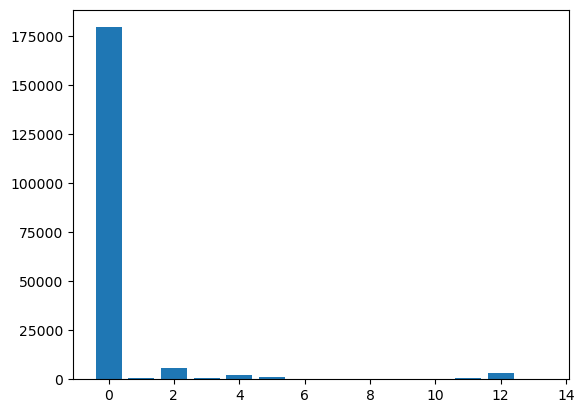

In [51]:
plt.bar([i for i in range(len(fit.scores_))], fit.scores_)

Significance order of features is Power-1 > solarRad_W/m2 > Week Day2 > Week Day > HR > temp_C > Hour > logtemp


In [52]:
features=SelectKBest(k=5,score_func=mutual_info_regression) # Test different k number of features, uses f-test ANOVA
#features=SelectKBest(k=3,score_func=mutual_info_regression) # Test different k number of features, uses f-test ANOVA

fit=features.fit(X,Y) #calculates the f_regression of the features
print(fit.scores_)
features_results=fit.transform(X)
print(features_results) # k=0:Power-1 k=1:solarRad_W/m2 k=2:Hour k=3:Week Day k=4:Week-Day^2

[1.46247128 0.12784773 0.23999197 0.50718289 0.17830506 0.11411811
 0.04393256 0.0474556  0.08208735 0.00952203 0.05261804 0.12585282
 0.17817383 0.05846047]
[[117.823342   17.728       1.          6.         36.       ]
 [119.1906989  16.981       2.          6.         36.       ]
 [117.9729915  18.504       3.          6.         36.       ]
 ...
 [110.6102361  14.346      21.          0.          0.       ]
 [110.7734901  13.404      22.          0.          0.       ]
 [111.4530872  19.441      23.          0.          0.       ]]


<BarContainer object of 14 artists>

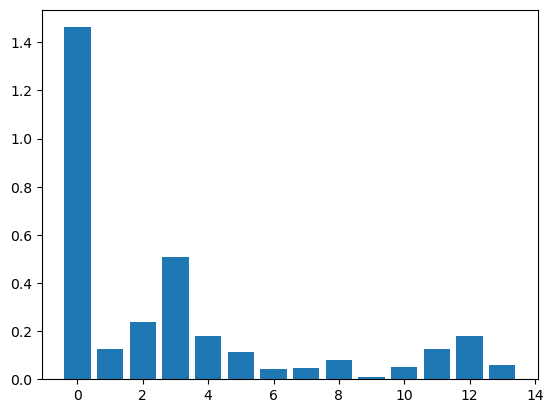

In [53]:
plt.bar([i for i in range(len(fit.scores_))], fit.scores_)

Significance  order of features is Power-1 > solarRad_W/m2 > Hour > Week Day > Week-Day^2 > temp_C > logtemp > HR


## 2- Wrapper methods 

#### Recursive Feature Elimination (RFE)

In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [55]:
model=LinearRegression() # LinearRegression Model as Estimator
rfe1=RFE(model,n_features_to_select=1)# using 1 features
rfe2=RFE(model,n_features_to_select=2) # using 2 features
rfe3=RFE(model,n_features_to_select=3)# using 3 features
fit1=rfe1.fit(X,Y)
fit2=rfe2.fit(X,Y)
fit3=rfe3.fit(X,Y)

In [56]:

print( "Feature Ranking (Linear Model, 1 features): %s" % (fit1.ranking_)) #logtemp
print( "Feature Ranking (Linear Model, 2 features): %s" % (fit2.ranking_)) #windSpeed_m/s
print( "Feature Ranking (Linear Model, 3 features): %s" % (fit3.ranking_)) #windSpeed_m/s, windGust_m/s

Feature Ranking (Linear Model, 1 features): [ 8  7 14  6  9 13  2  3 10  4 12  1 11  5]
Feature Ranking (Linear Model, 2 features): [ 7  6 13  5  8 12  1  2  9  3 11  1 10  4]
Feature Ranking (Linear Model, 3 features): [ 6  5 12  4  7 11  1  1  8  2 10  1  9  3]


## 3- Emsemble methods 

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
model = RandomForestRegressor()
model.fit(X, Y)
print(model.feature_importances_) # Power-1 hour solarRad_W/m2 HR pres_mbar temp 

[8.90038852e-01 1.53500345e-03 2.45216941e-03 9.59481215e-02
 1.46011715e-03 1.73839854e-03 5.70468353e-04 5.55692851e-04
 1.73517954e-03 1.50511541e-04 3.48011578e-04 1.53182987e-03
 1.45113664e-03 4.84507608e-04]


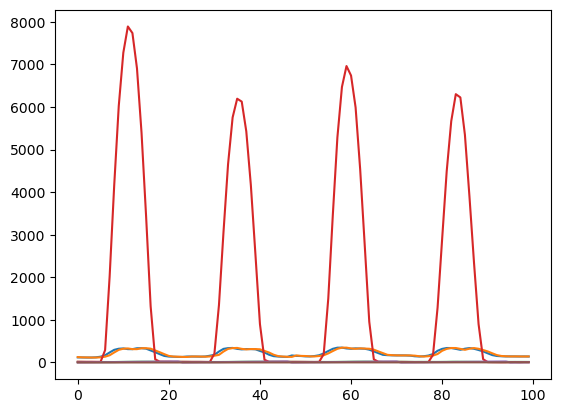

In [59]:
# Why temperature is a good feature for electricity consumption
plt.plot(Y[1200:1300])
plt.plot(X[1200:1300,0])
plt.plot(X[1200:1300,1])
plt.plot(X[1200:1300,2])
plt.plot(X[1200:1300,3])
plt.plot(X[1200:1300,4])
plt.show()

Significance  order of features is Power-1 > Hour > solarRad_W/m2 > HR > pres_mbar > temp_C >  Week Day > logtemp


## Final Feature Engineering 

From the three methods Power-1, solarRad_W/m2, Hour, temp_C and Week Day2 seems to be the most important features. Avoiding repeated data features like log_temp and HDH for temp_c and Week Day for Week Day2 gives a better feature importance values 
to:
• Reduce the number of variables to make the models more intelligible;
• Reduce the computational complexity of model development;
• Improve the models accuracy;
• Avoid overfitting

In [60]:
Z=df_data.values
X1=Z[:,[1,2,3,4,6,7,8,9,13]]

### 1- Filter Method

[1.4624534  0.12788268 0.2403615  0.50726621 0.11459141 0.04361705
 0.04718183 0.08169713 0.17824087]
[[117.823342     7.93        17.728        1.          36.        ]
 [119.1906989    7.26341667  16.981        2.          36.        ]
 [117.9729915    6.83133333  18.504        3.          36.        ]
 ...
 [110.6102361   12.565       14.346       21.           0.        ]
 [110.7734901   11.92666667  13.404       22.           0.        ]
 [111.4530872   11.33857143  19.441       23.           0.        ]]


<BarContainer object of 9 artists>

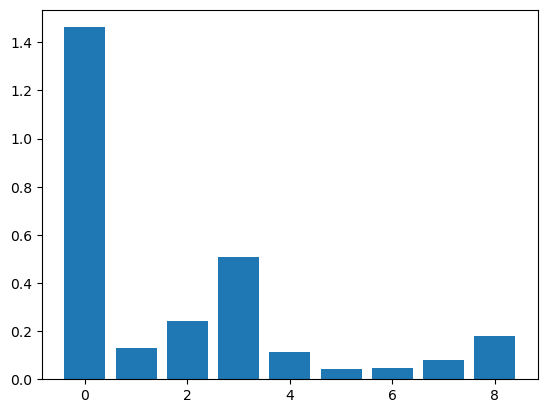

In [61]:
features=SelectKBest(k=5,score_func=mutual_info_regression)
fit1=features.fit(X1,Y) #calculates the scores using the score_function f_regression of the features
print(fit1.scores_)
features_results1=fit1.transform(X1)
print(features_results1) # k=0:Power-1 k=1:Hour k=2:solarRad_W/m2 k=3:Week Day2 k=4:temp_C
plt.bar([i for i in range(len(fit1.scores_))], fit1.scores_)

### 2- Wrapper methods 

In [62]:
f1=rfe1.fit(X1,Y)
f2=rfe2.fit(X1,Y)
f3=rfe3.fit(X1,Y)
print( "Feature Ranking (Linear Model, 1 features): %s" % (f1.ranking_)) #windSpeed_m/s
print( "Feature Ranking (Linear Model, 2 features): %s" % (f2.ranking_)) #windSpeed_m/s, windGust_m/s 
print( "Feature Ranking (Linear Model, 3 features): %s" % (f3.ranking_)) #windSpeed_m/s, windGust_m/s, Hour

Feature Ranking (Linear Model, 1 features): [4 7 9 3 8 1 2 5 6]
Feature Ranking (Linear Model, 2 features): [3 6 8 2 7 1 1 4 5]
Feature Ranking (Linear Model, 3 features): [2 5 7 1 6 1 1 3 4]


### 3- Ensemble methods 

In [63]:
model1 = RandomForestRegressor()
model1.fit(X1, Y)
print(model1.feature_importances_) # Power-1 > hour > Temp > Week-Day^2 > solar

[8.89274450e-01 3.34268812e-03 2.58711216e-03 9.69350597e-02
 1.90900982e-03 6.17193719e-04 5.98399463e-04 1.92463632e-03
 2.81145097e-03]


Conclussion: Eventhough wrapper method give very different results, "Hour" is still relevent in the method. Filter method and ensemble method gave similar results. Hence  power-1, temp_c, solar rad, hour and Week-Day^2 [1,2,3,4,13] are selected as relevant features.

### Features selected: power-1, temp_c, solar rad, hour and weekday2 

# Regression 

In [64]:
from sklearn.model_selection import train_test_split
from sklearn import  metrics
import statsmodels.api as sm

## Time series analysis 

In [65]:
#The frequency of decomposition must be an interval, which 'may' repeat. So we have data with 1 hour frequency and we are looking for a daily repetition of behavior.
# So the frequency is 24h
freq = 24



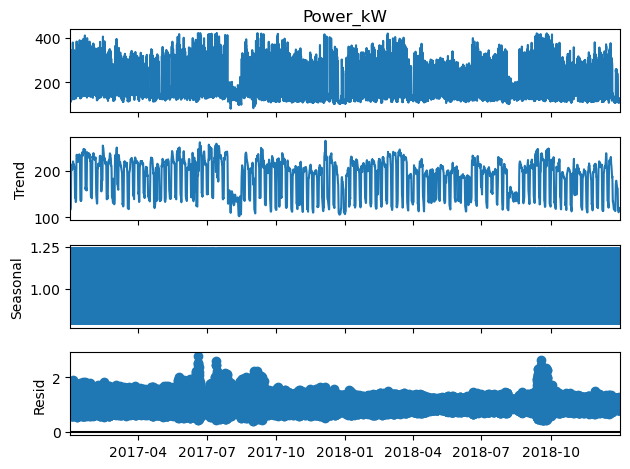

In [66]:
res = sm.tsa.seasonal_decompose(df_data['Power_kW'],
                                period=freq,
                                model='multiplicative')
#model='additive'
resplot = res.plot()

In [67]:
freq=24*7

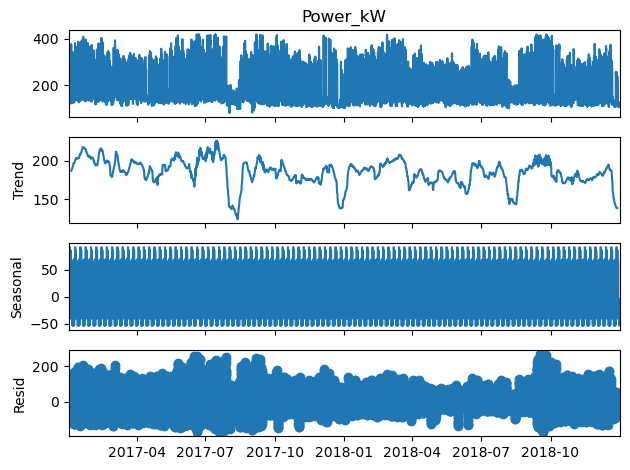

In [68]:
res = sm.tsa.seasonal_decompose(df_data['Power_kW'],
                                period=freq,
                                model='additive')
resplot = res.plot()

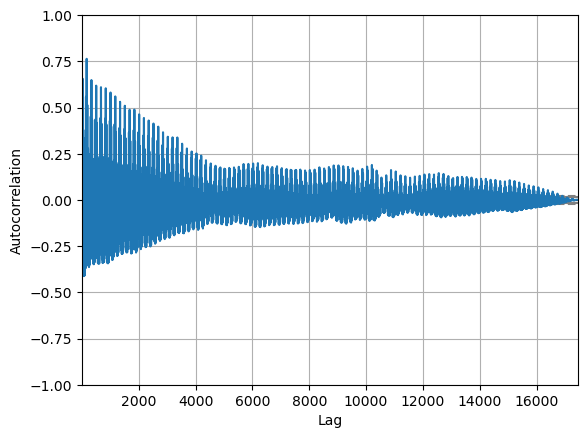

In [69]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
autocorrelation_plot(df_data['Power_kW'])
plt.show()

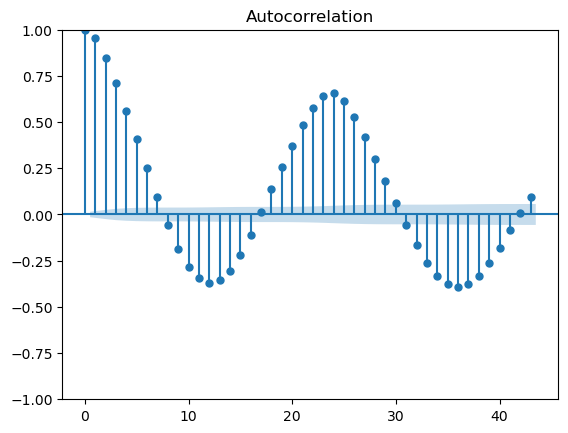

In [70]:
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib import pyplot
plot_acf(df_data['Power_kW'])
plt.show()


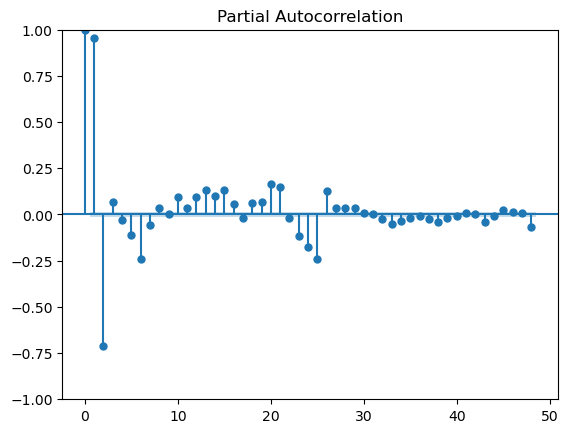

In [71]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
plot_pacf(df_data['Power_kW'],lags=48) # one day=24 lags / one week 24*7=168 lags
plt.show()

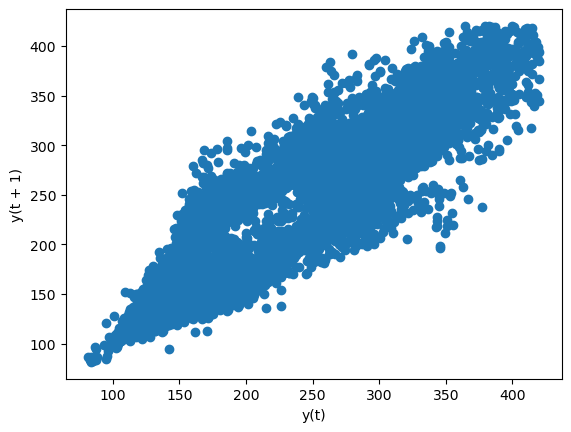

In [72]:
from pandas.plotting import lag_plot
lag_plot(df_data['Power_kW'])
plt.show()

Its clear from the plots that the model gives sufficient autocorrelation but the trends are difficult to read from the time series plots.

## AutoRegressive  Models 

### AR

In [73]:
from statsmodels.tsa.ar_model import AutoReg


#Identify output Y
Y=df_data.values[:,0]

split_point = len(Y) - 1000
train, test = Y[0:split_point], Y[split_point:]
# train autoregression
window = 1
model = AutoReg(train, lags=window)
#model=ARIMA(train, order=(1, 1,1))
model_fit = model.fit()

print(model_fit.summary())


                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                16451
Model:                     AutoReg(1)   Log Likelihood              -75124.727
Method:               Conditional MLE   S.D. of innovations             23.287
Date:                Mon, 18 Mar 2024   AIC                         150255.455
Time:                        21:27:33   BIC                         150278.579
Sample:                             1   HQIC                        150263.092
                                16451                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4357      0.468     18.037      0.000       7.519       9.352
y.L1           0.9545      0.002    410.748      0.000       0.950       0.959
                                    Roots           

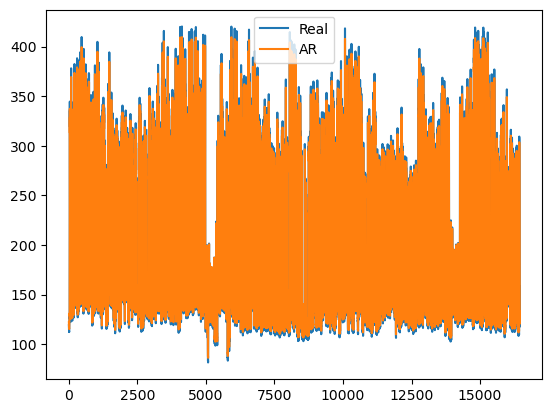

In [74]:

plt.plot(train,label='Real')
plt.plot(model_fit.fittedvalues,label='AR')
plt.legend()

Overall, the AutoReg model seems to provide a good fit to the data, with statistically significant coefficients and relatively low information criteria values. The positive coefficient for the lagged variable suggests a strong positive autocorrelation, indicating that past values of the time series have a significant impact on the current value. This model can be used for forecasting future values of the time series based on its past values.

#### Testing the AR model with test data 

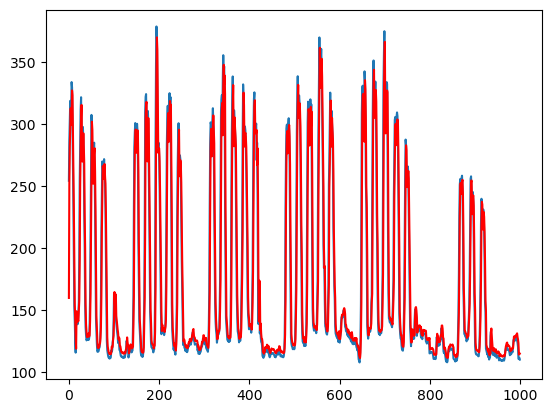

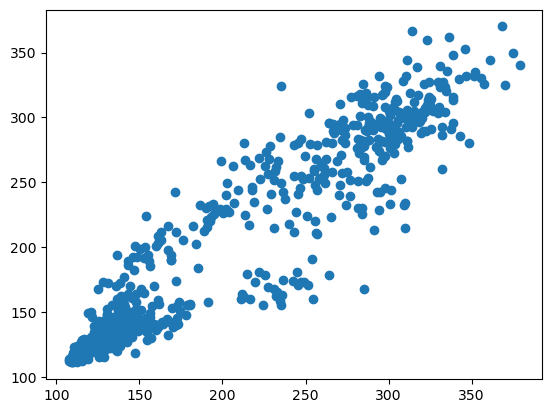

In [75]:
from sklearn.metrics import mean_squared_error
from math import sqrt

coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

plt.scatter(test,predictions)
plt.show()


#### Evaluating the model error 

In [76]:
MAE_AR=metrics.mean_absolute_error(test,predictions) 
MBE_AR=np.mean(test-predictions) #here we calculate MBE
MSE_AR=metrics.mean_squared_error(test,predictions)  
RMSE_AR= np.sqrt(metrics.mean_squared_error(test,predictions))
cvRMSE_AR=RMSE_AR/np.mean(test)
NMBE_AR=MBE_AR/np.mean(test)
print(MAE_AR, MBE_AR,MSE_AR, RMSE_AR,cvRMSE_AR,NMBE_AR)

13.48201364008088 -0.5549386474128961 473.51076394881596 21.76030247833922 0.12481804861184051 -0.003183152400492661


The autoregressive (AR) model demonstrates reasonable predictive performance as per ASHRAE and IPMVP standards, with relatively low error metrics overall. However, there is a slight tendency for the model to underestimate the actual values, as indicated by the negative bias

### Split Data into training and test data 

#### Create vector with inputs and outputs

In [77]:
#Create matrix from data frame
Z=df_data.values
#Identify output Y
Y=Z[:,0]
#Identify input Y
X=Z[:,[1,2,3,4,13]] #power-1, temp, solar rad, hour and Week-Day^2
X2=Z[:,[1,4,2]] # Power-1 hour temp

In [78]:
#by default, it chooses randomly 75% of the data for training and 25% for testing
X_train, X_test, y_train, y_test = train_test_split(X,Y)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,Y)
print(X_train)
print(y_train)

[[1.82104395e+02 2.03633333e+01 0.00000000e+00 2.10000000e+01
  0.00000000e+00]
 [1.33474377e+02 1.98766667e+01 3.15500000e+00 2.10000000e+01
  9.00000000e+00]
 [1.19785529e+02 2.46600000e+01 0.00000000e+00 1.10000000e+01
  2.50000000e+01]
 ...
 [1.16501612e+02 1.65350000e+01 4.89900000e+00 5.00000000e+00
  1.60000000e+01]
 [2.81010575e+02 1.81950000e+01 8.43700000e+03 1.10000000e+01
  1.60000000e+01]
 [2.72058605e+02 2.15091667e+01 3.67769000e+02 1.80000000e+01
  9.00000000e+00]]
[172.2480396 124.8972634 120.2966401 ... 119.0167706 285.9385438
 225.4112861]


## 1- Linear Regression 

In [79]:
from sklearn import  linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred_LR = regr.predict(X_test)


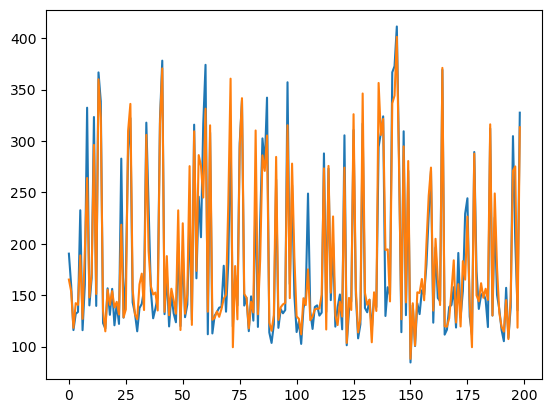

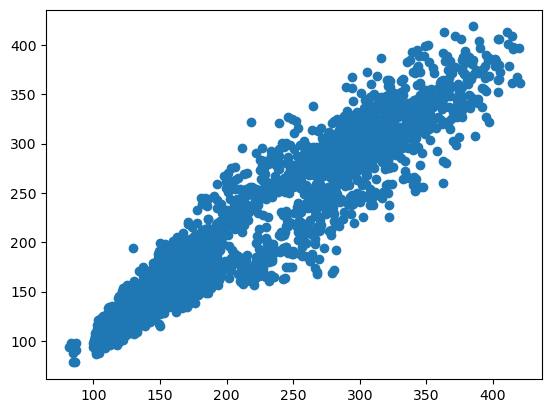

In [80]:
plt.plot(y_test[1:200])
plt.plot(y_pred_LR[1:200])
plt.show()
plt.scatter(y_test,y_pred_LR)

In [81]:
#Evaluate errors
MAE_LR=metrics.mean_absolute_error(y_test,y_pred_LR) 
MBE_LR=np.mean(y_test- y_pred_LR) #here we calculate MBE
MSE_LR=metrics.mean_squared_error(y_test,y_pred_LR)  
RMSE_LR= np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR))
cvRMSE_LR=RMSE_LR/np.mean(y_test)
NMBE_LR=MBE_LR/np.mean(y_test)
result = pd.DataFrame({
    'MAE': [MAE_LR],
    'MBE': [MBE_LR],
    'MSE': [MSE_LR],
    'RMSE': [RMSE_LR],
    'cvRMSE': [cvRMSE_LR],
    'NMBE': [NMBE_LR]
},index=['Linear Regression'])
result.index.name = 'REGRESSION METHOD' 
result

,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Linear Regression,14.935332,-0.065319,444.983541,21.094633,0.113868,-0.000353


## 2-  Support Vector Regressor

### Scale data 

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

ss_X = StandardScaler()
ss_y = StandardScaler()
X_train_ss = ss_X.fit_transform(X_train)
y_train_ss = ss_y.fit_transform(y_train.reshape(-1,1))

In [83]:
regr = SVR(kernel='linear')
#kernel='linear'
#kernel='sigmoid'
#kernel='rbf'

regr.fit(X_train_ss,y_train_ss)

E:\Softwares\anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

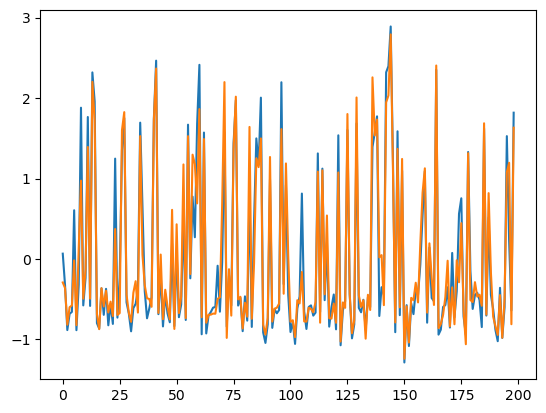

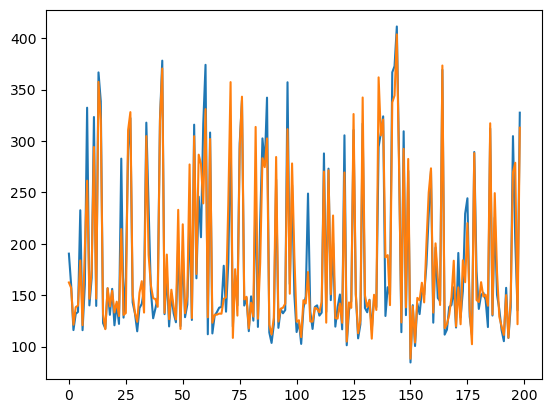

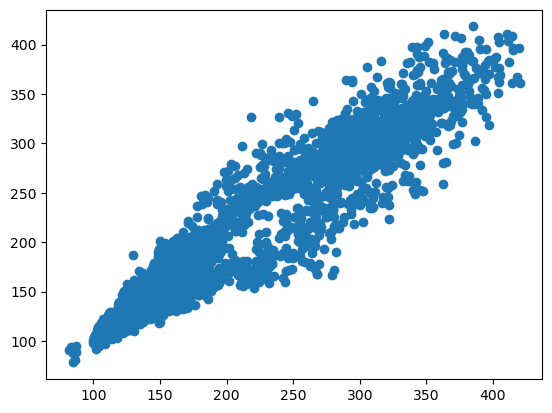

In [84]:
y_pred_SVR = regr.predict(ss_X.fit_transform(X_test))
y_test_SVR=ss_y.fit_transform(y_test.reshape(-1,1))#It is just one column we have to reshape, otherwise its a line
y_pred_SVR2=ss_y.inverse_transform(y_pred_SVR.reshape(-1,1))

plt.plot(y_test_SVR[1:200])
plt.plot(y_pred_SVR[1:200])
plt.show()
plt.plot(y_test[1:200])
plt.plot(y_pred_SVR2[1:200])
plt.show()
plt.scatter(y_test, y_pred_SVR2)

In [85]:
MAE_SVR=metrics.mean_absolute_error(y_test_SVR,y_pred_SVR) 
MBE_SVR=np.mean(y_test- y_pred_SVR) #here we calculate MBE
MSE_SVR=metrics.mean_squared_error(y_test_SVR,y_pred_SVR)  
RMSE_SVR= np.sqrt(metrics.mean_squared_error(y_test_SVR,y_pred_SVR))
cvRMSE_SVR=RMSE_SVR/np.mean(y_test)
NMBE_SVR=MBE_SVR/np.mean(y_test)
result.loc['Support Vector Regression'] = [MAE_SVR, MBE_SVR, MSE_SVR, RMSE_SVR, cvRMSE_SVR, NMBE_SVR]
result

,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Linear Regression,14.935332,-0.065319,444.983541,21.094633,0.113868,-0.000353
Support Vector Regression,0.181331,185.269808,0.074232,0.272455,0.001471,1.000076


## 3- Decision Tree Regressor 

In [86]:
from sklearn.tree import DecisionTreeRegressor

# Create Regression Decision Tree object
DT_regr_model = DecisionTreeRegressor(min_samples_leaf=5)

# Train the model using the training sets
DT_regr_model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_DT = DT_regr_model.predict(X_test)

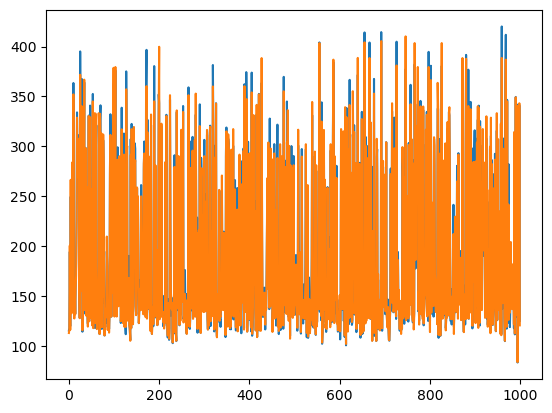

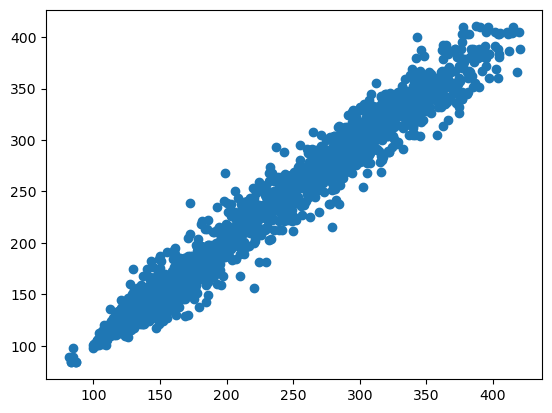

In [87]:
plt.plot(y_test[1000:2000])
plt.plot(y_pred_DT[1000:2000])
plt.show()
plt.scatter(y_test,y_pred_DT)

In [88]:
#Evaluate errors
MAE_DT=metrics.mean_absolute_error(y_test,y_pred_DT) 
MBE_DT=np.mean(y_test-y_pred_DT) #here we calculate MBE
MSE_DT=metrics.mean_squared_error(y_test,y_pred_DT)  
RMSE_DT= np.sqrt(metrics.mean_squared_error(y_test,y_pred_DT))
cvRMSE_DT=RMSE_DT/np.mean(y_test)
NMBE_DT=MBE_DT/np.mean(y_test)
result.loc['Decision Tree Regression'] = [MAE_DT, MBE_DT,MSE_DT, RMSE_DT,cvRMSE_DT,NMBE_DT]
result

,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Linear Regression,14.935332,-0.065319,444.983541,21.094633,0.113868,-0.000353
Support Vector Regression,0.181331,185.269808,0.074232,0.272455,0.001471,1.000076
Decision Tree Regression,6.870692,-0.039233,112.842910,10.622754,0.057341,-0.000212


## 4- Random forest 

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 200, 
              'min_samples_split': 15,
              'max_features': 'sqrt',
              'max_depth': 20,
              'max_leaf_nodes': None}
RF_model = RandomForestRegressor(**parameters)
#RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)

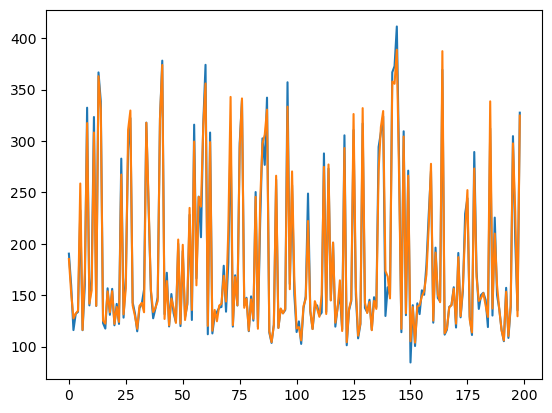

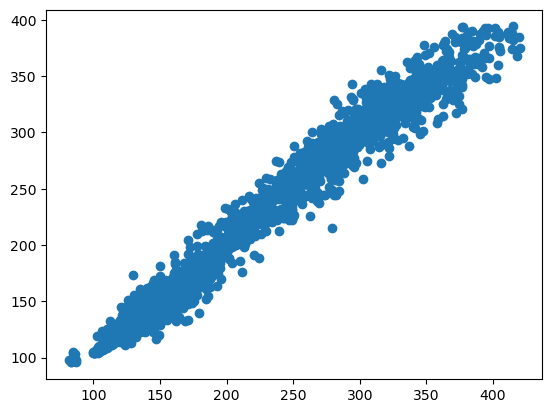

In [91]:
plt.plot(y_test[1:200])
plt.plot(y_pred_RF[1:200])
plt.show()
plt.scatter(y_test,y_pred_RF)

In [92]:
#Evaluate errors
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF) 
MBE_RF=np.mean(y_test-y_pred_DT) #here we calculate MBE
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF))
cvRMSE_RF=RMSE_RF/np.mean(y_test)
NMBE_RF=MBE_RF/np.mean(y_test)
result.loc['Random Forest Regression'] = [MAE_RF,MBE_RF,MSE_RF,RMSE_RF,cvRMSE_RF,NMBE_RF]
result

,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Linear Regression,14.935332,-0.065319,444.983541,21.094633,0.113868,-0.000353
Support Vector Regression,0.181331,185.269808,0.074232,0.272455,0.001471,1.000076
Decision Tree Regression,6.870692,-0.039233,112.842910,10.622754,0.057341,-0.000212
Random Forest Regression,6.262285,-0.039233,98.717732,9.935680,0.053632,-0.000212


## 5-Uniformized data 

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Random forest uniformized data 

In [94]:
parameters = {'bootstrap': True,
              'min_samples_leaf': 3,
              'n_estimators': 100, 
              'min_samples_split': 15,
              'max_features': 'sqrt',
              'max_depth': 10,
              'max_leaf_nodes': None}

RF_model2 = RandomForestRegressor(**parameters)
RF_model2.fit(X_train_scaled, y_train.reshape(-1,1))
y_pred_RF2 = RF_model2.predict(X_test_scaled)


E:\Softwares\anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


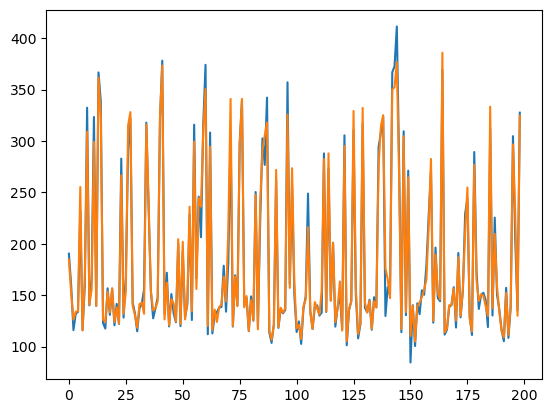

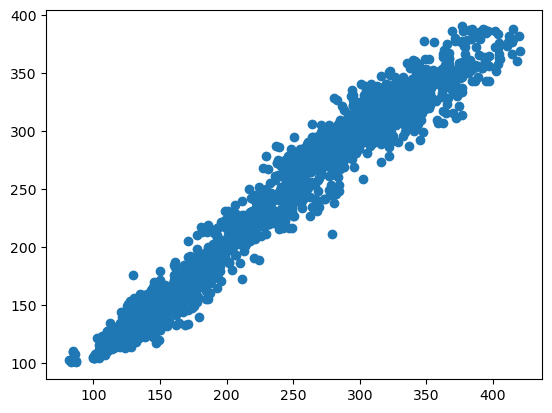

In [95]:
plt.plot(y_test[1:200])
plt.plot(y_pred_RF2[1:200])
plt.show()
plt.scatter(y_test,y_pred_RF2)

In [96]:
#Evaluate errors
MAE_RF=metrics.mean_absolute_error(y_test,y_pred_RF2) 
MBE_RF=np.mean(y_test-y_pred_RF2) #here we calculate MBE
MSE_RF=metrics.mean_squared_error(y_test,y_pred_RF2)  
RMSE_RF= np.sqrt(metrics.mean_squared_error(y_test,y_pred_RF2))
cvRMSE_RF=RMSE_RF/np.mean(y_test)
NMBE_RF=MBE_RF/np.mean(y_test)
result.loc['Uniform Random Forest Regression'] = [MAE_RF,MBE_RF,MSE_RF,RMSE_RF,cvRMSE_RF,NMBE_RF]
result

,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Linear Regression,14.935332,-0.065319,444.983541,21.094633,0.113868,-0.000353
Support Vector Regression,0.181331,185.269808,0.074232,0.272455,0.001471,1.000076
Decision Tree Regression,6.870692,-0.039233,112.842910,10.622754,0.057341,-0.000212
Random Forest Regression,6.262285,-0.039233,98.717732,9.935680,0.053632,-0.000212
Uniform Random Forest Regression,7.044884,-0.068332,123.673700,11.120868,0.060030,-0.000369


## 6- Trying Less features 

In [97]:
RF2_model = RandomForestRegressor(**parameters)
#RF_model = RandomForestRegressor()
RF2_model.fit(X2_train, y2_train)
y2_pred_RF = RF2_model.predict(X2_test)

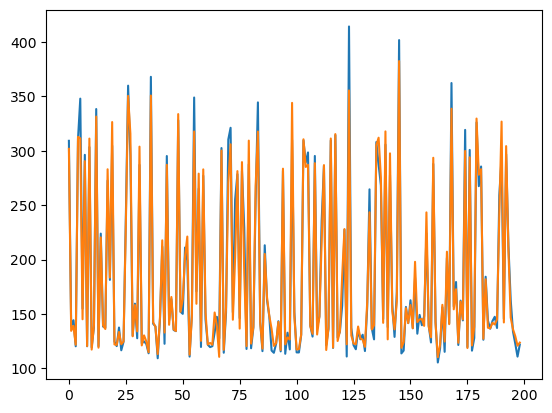

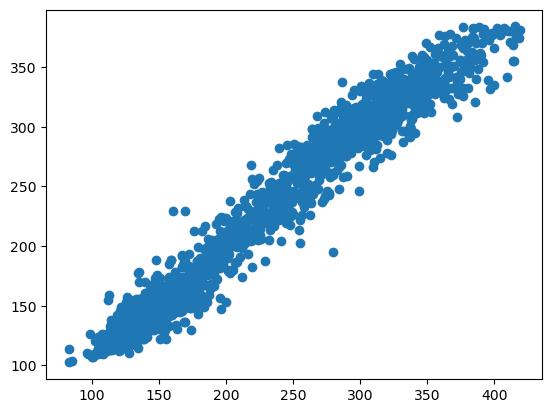

In [98]:
plt.plot(y2_test[1:200])
plt.plot(y2_pred_RF[1:200])
plt.show()
plt.scatter(y2_test,y2_pred_RF)

In [99]:
#Evaluate errors
MAE_RF2=metrics.mean_absolute_error(y2_test,y2_pred_RF) 
MBE_RF2=np.mean(y2_test-y2_pred_RF) #here we calculate MBE
MSE_RF2=metrics.mean_squared_error(y2_test,y2_pred_RF)  
RMSE_RF2= np.sqrt(metrics.mean_squared_error(y2_test,y2_pred_RF))
cvRMSE_RF2=RMSE_RF2/np.mean(y2_test)
NMBE_RF2=MBE_RF2/np.mean(y2_test)
print(MAE_RF2,MBE_RF2,MSE_RF2,RMSE_RF2,cvRMSE_RF2,NMBE_RF2)
result.loc['Random Forest Regression 3 Features'] = [MAE_RF2,MBE_RF2,MSE_RF2,RMSE_RF2,cvRMSE_RF2,NMBE_RF2]
result

7.665882528550866 0.032215765295657894 134.25098879301632 11.586672895746057 0.06280197063398787 0.00017461557465665205


,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Linear Regression,14.935332,-0.065319,444.983541,21.094633,0.113868,-0.000353
Support Vector Regression,0.181331,185.269808,0.074232,0.272455,0.001471,1.000076
Decision Tree Regression,6.870692,-0.039233,112.842910,10.622754,0.057341,-0.000212
Random Forest Regression,6.262285,-0.039233,98.717732,9.935680,0.053632,-0.000212
Uniform Random Forest Regression,7.044884,-0.068332,123.673700,11.120868,0.060030,-0.000369
Random Forest Regression 3 Features,7.665883,0.032216,134.250989,11.586673,0.062802,0.000175


## 7- Gradient Boosting 

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

#params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
#          'learning_rate': 0.01, 'loss': 'ls'}
#GB_model = GradientBoostingRegressor(**params)

GB_model = GradientBoostingRegressor()
GB_model.fit(X_train, y_train)
y_pred_GB =GB_model.predict(X_test)

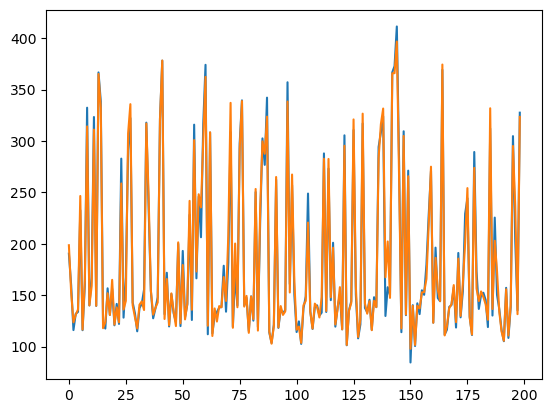

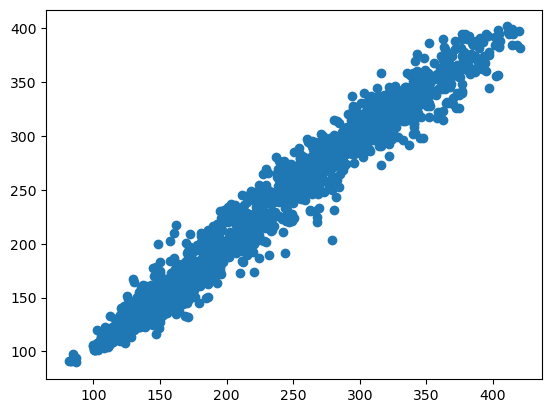

In [101]:
plt.plot(y_test[1:200])
plt.plot(y_pred_GB[1:200])
plt.show()
plt.scatter(y_test,y_pred_GB)

In [102]:
MAE_GB=metrics.mean_absolute_error(y_test,y_pred_GB) 
MBE_GB=np.mean(y_test-y_pred_GB)
MSE_GB=metrics.mean_squared_error(y_test,y_pred_GB)  
RMSE_GB= np.sqrt(metrics.mean_squared_error(y_test,y_pred_GB))
cvRMSE_GB=RMSE_GB/np.mean(y_test)
NMBE_GB=MBE_GB/np.mean(y_test)
result.loc['Gradient Boosting Regression'] = [MAE_GB,MBE_GB,MSE_GB,RMSE_GB,cvRMSE_GB,NMBE_GB]
result

,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Linear Regression,14.935332,-0.065319,444.983541,21.094633,0.113868,-0.000353
Support Vector Regression,0.181331,185.269808,0.074232,0.272455,0.001471,1.000076
Decision Tree Regression,6.870692,-0.039233,112.842910,10.622754,0.057341,-0.000212
Random Forest Regression,6.262285,-0.039233,98.717732,9.935680,0.053632,-0.000212
Uniform Random Forest Regression,7.044884,-0.068332,123.673700,11.120868,0.060030,-0.000369
Random Forest Regression 3 Features,7.665883,0.032216,134.250989,11.586673,0.062802,0.000175
Gradient Boosting Regression,6.733915,-0.169766,106.815693,10.335168,0.055789,-0.000916


## 8- Extreme Gradient Boosting 

In [103]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [104]:
from xgboost import XGBRegressor

#params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
#          'learning_rate': 0.01, 'loss': 'ls'}
#GB_model = GradientBoostingRegressor(**params)

XGB_model = XGBRegressor()
XGB_model.fit(X_train, y_train)
y_pred_XGB =XGB_model.predict(X_test)

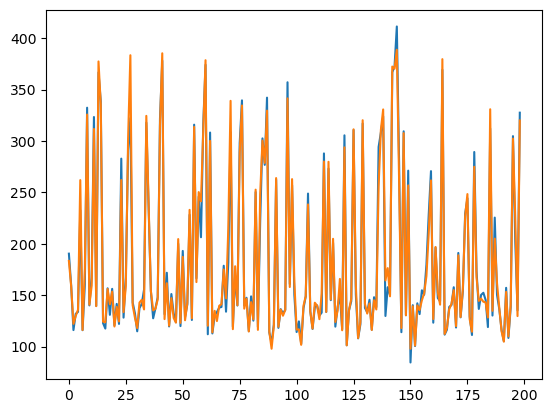

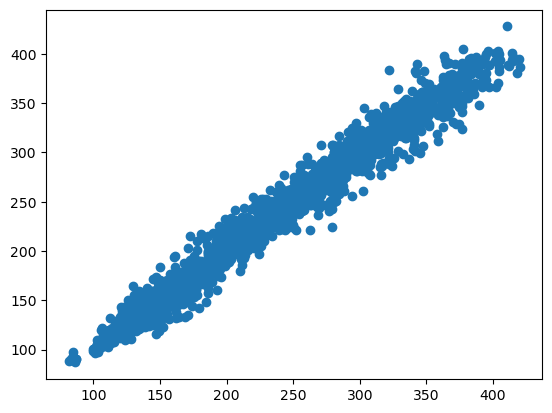

In [105]:
plt.plot(y_test[1:200])
plt.plot(y_pred_XGB[1:200])
plt.show()
plt.scatter(y_test,y_pred_XGB)

In [106]:
MAE_XGB=metrics.mean_absolute_error(y_test,y_pred_XGB) 
MBE_XGB=np.mean(y_test-y_pred_XGB)
MSE_XGB=metrics.mean_squared_error(y_test,y_pred_XGB)  
RMSE_XGB= np.sqrt(metrics.mean_squared_error(y_test,y_pred_XGB))
cvRMSE_XGB=RMSE_XGB/np.mean(y_test)
NMBE_XGB=MBE_GB/np.mean(y_test)
result.loc['Extreme Gradient Boosting Regression'] = [MAE_XGB,MBE_XGB,MSE_XGB,RMSE_XGB,cvRMSE_XGB,NMBE_XGB]
result

,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Linear Regression,14.935332,-0.065319,444.983541,21.094633,0.113868,-0.000353
Support Vector Regression,0.181331,185.269808,0.074232,0.272455,0.001471,1.000076
Decision Tree Regression,6.870692,-0.039233,112.842910,10.622754,0.057341,-0.000212
Random Forest Regression,6.262285,-0.039233,98.717732,9.935680,0.053632,-0.000212
Uniform Random Forest Regression,7.044884,-0.068332,123.673700,11.120868,0.060030,-0.000369
Random Forest Regression 3 Features,7.665883,0.032216,134.250989,11.586673,0.062802,0.000175
Gradient Boosting Regression,6.733915,-0.169766,106.815693,10.335168,0.055789,-0.000916
Extreme Gradient Boosting Regression,5.940332,-0.023185,85.134472,9.226834,0.049806,-0.000916


## 9- Bootstrapping 

In [107]:
from sklearn.ensemble import BaggingRegressor

BT_model = BaggingRegressor()
BT_model.fit(X_train, y_train)
y_pred_BT =BT_model.predict(X_test)


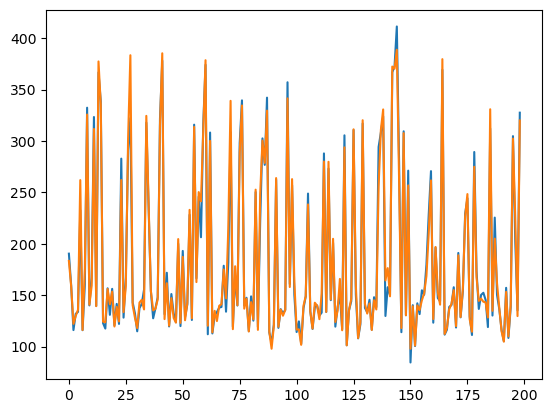

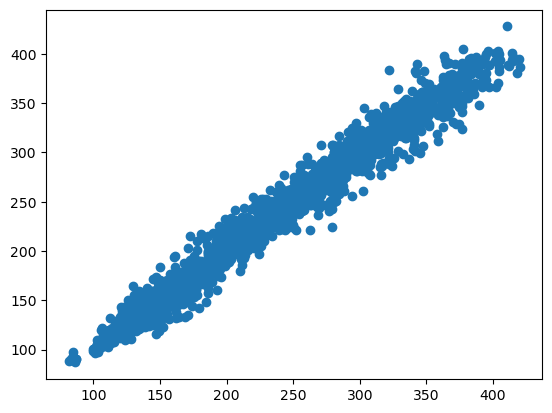

In [108]:
plt.plot(y_test[1:200])
plt.plot(y_pred_XGB[1:200])
plt.show()
plt.scatter(y_test,y_pred_XGB)

In [109]:
MAE_BT=metrics.mean_absolute_error(y_test,y_pred_BT) 
MBE_BT=np.mean(y_test-y_pred_BT)
MSE_BT=metrics.mean_squared_error(y_test,y_pred_BT)  
RMSE_BT= np.sqrt(metrics.mean_squared_error(y_test,y_pred_BT))
cvRMSE_BT=RMSE_BT/np.mean(y_test)
NMBE_BT=MBE_BT/np.mean(y_test)
result.loc['Bootstrapping Regression'] = [MAE_BT,MBE_BT,MSE_BT,RMSE_BT,cvRMSE_BT,NMBE_BT]
result

,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Linear Regression,14.935332,-0.065319,444.983541,21.094633,0.113868,-0.000353
Support Vector Regression,0.181331,185.269808,0.074232,0.272455,0.001471,1.000076
Decision Tree Regression,6.870692,-0.039233,112.842910,10.622754,0.057341,-0.000212
Random Forest Regression,6.262285,-0.039233,98.717732,9.935680,0.053632,-0.000212
Uniform Random Forest Regression,7.044884,-0.068332,123.673700,11.120868,0.060030,-0.000369
Random Forest Regression 3 Features,7.665883,0.032216,134.250989,11.586673,0.062802,0.000175
Gradient Boosting Regression,6.733915,-0.169766,106.815693,10.335168,0.055789,-0.000916
Extreme Gradient Boosting Regression,5.940332,-0.023185,85.134472,9.226834,0.049806,-0.000916
Bootstrapping Regression,6.227999,0.015274,95.319156,9.763153,0.052701,0.000082


## 10- Neural Networks 

In [110]:
from sklearn.neural_network import MLPRegressor

NN_model = MLPRegressor(hidden_layer_sizes=(5,5,5))
NN_model.fit(X_train,y_train)
y_pred_NN = NN_model.predict(X_test)


E:\Softwares\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


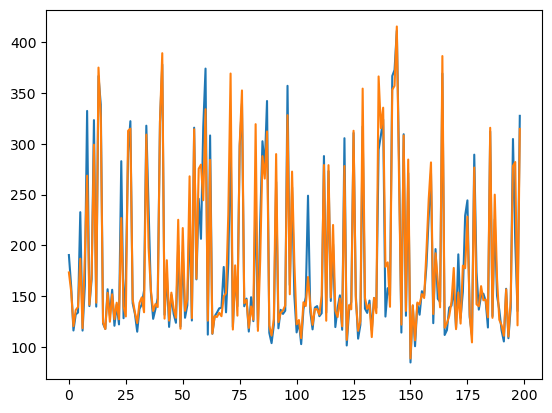

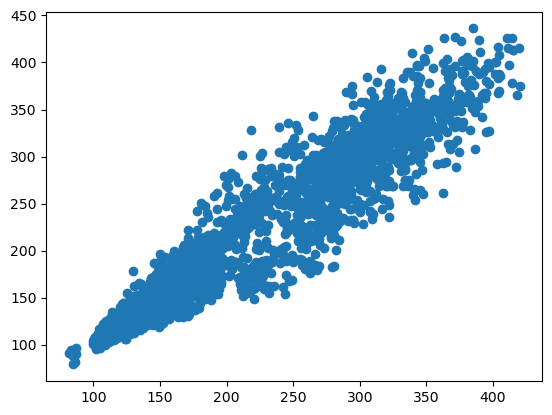

In [111]:
plt.plot(y_test[1:200])
plt.plot(y_pred_NN[1:200])
plt.show()
plt.scatter(y_test,y_pred_NN)

In [112]:
MAE_NN=metrics.mean_absolute_error(y_test,y_pred_NN)
MBE_NN=np.mean(y_test-y_pred_NN)
MSE_NN=metrics.mean_squared_error(y_test,y_pred_NN)  
RMSE_NN= np.sqrt(metrics.mean_squared_error(y_test,y_pred_NN))
cvRMSE_NN=RMSE_NN/np.mean(y_test)
NMBE_NN=MBE_NN/np.mean(y_test)
result.loc['Neural Network Regression'] = [MAE_NN,MBE_NN,MSE_NN,RMSE_NN,cvRMSE_NN,NMBE_NN]
result

,MAE,MBE,MSE,RMSE,cvRMSE,NMBE
REGRESSION METHOD,,,,,,
Linear Regression,14.935332,-0.065319,444.983541,21.094633,0.113868,-0.000353
Support Vector Regression,0.181331,185.269808,0.074232,0.272455,0.001471,1.000076
Decision Tree Regression,6.870692,-0.039233,112.842910,10.622754,0.057341,-0.000212
Random Forest Regression,6.262285,-0.039233,98.717732,9.935680,0.053632,-0.000212
Uniform Random Forest Regression,7.044884,-0.068332,123.673700,11.120868,0.060030,-0.000369
Random Forest Regression 3 Features,7.665883,0.032216,134.250989,11.586673,0.062802,0.000175
Gradient Boosting Regression,6.733915,-0.169766,106.815693,10.335168,0.055789,-0.000916
Extreme Gradient Boosting Regression,5.940332,-0.023185,85.134472,9.226834,0.049806,-0.000916
Bootstrapping Regression,6.227999,0.015274,95.319156,9.763153,0.052701,0.000082


# Conclusion 

Eventhough every regression models demonstrate varying degrees of performance, each one seems to be as per ASHRAE and IPMVP standards.

Based on the error metrics results, here is an ordered preference of regression methods:

1. Gradient Boosting Regression
2. Extreme Gradient Boosting Regression
3. Random Forest Regression
4. Bootstrapping Regression
5. Decision Tree Regression
6. Random Forest Regression 3 Features
7. Uniform Random Forest Regression
8. Support Vector Regression
9. Linear Regression
10. Neural Network Regression

This ranking is based on the overall performance of each method across multiple error metrics. Gradient Boosting Regression and Extreme Gradient Boosting Regression are ranked highest due to their consistently low error metrics, indicating better predictive performance compared to other methods. 

However, as per ASHRAE and IPMVP standards, considering cvRMSE and NMBE as the deciding parameters, Random Forest Regression model has the least values. While it may not rank the highest in terms of overall performance compared to Gradient Boosting Regression and Extreme Gradient Boosting Regression, it still demonstrates competitive performance across various error metrics.

Overall, considering its competitive performance, robustness, and ease of use, the Random Forest Regression model emerges as a favorable choice for the forecast model.


### Features selected: power-1, temp_c, solar rad, hour and weekday2 

### Selected Model: Random Forest model

# Saving Selected Random Forest model

In [113]:
import pickle

In [114]:
#save LR model
with open('RF_model.pkl','wb') as file:
    pickle.dump(RF_model, file)